### 하이퍼파라미터
* 예측력을 높이기 위해 사용
* 과대/과소 적합을 방지하기 위해 사용
* 사용자가 지정하는 파라미터

#### 하이퍼파라미터 튜닝
* 특정 알고리즘의 매개변수 값을 변경하면서 최적의 파라미터를 찾는 방식
* GridSearchCV클래스를 통해 하이퍼파라미터 탐색과 교차 검증을 한번에 수행

#### GridSearchCV
* 교차 검증으로 하이퍼파라미터 탐색을 수행
* 최상의 모델을 찾은 후 훈련 세트 전체를 사용해 최종 모델을 훈련
* 매개변수
    - GridSearchCV(모델, param_grid = 파라미터, cv=반복횟수, n_jobs=코어 수(-1, 모든 코어 사용))
         - 반복횟수는 3~5 정도 많이 사용

### K-최근접 이웃 알고리즘
* 주위에서 가장 가까운 다른 데이터를 보고 현재 데이터를 판단

#### 하이퍼파라미터
* n_neighbors
    - 기본 가까운 5개의 데이터를 보고 자기 자신이 어디에 속하는지를 판단
    - 비교하고자 하는 데이터의 수가 적을 수록 과대 적합이 됨
* metric : 거리계산 척도
    - euclidean(녹색) : 유클리디안 거리 측정
        * 목표 지점까지 가장 짧은 거리
    - manhattan(빨간색) : 맨하튼 거리 측정 방법
        * 찾아가는 경로의 모든 길이의 합
* weights : 가중치
    - uniform : 거리에 가중치 부여하지 않음(균일한 가중치)
    - distance : 거리에 가중치 부여(가까이 있는 데이터에 가중치)

![img](images/거리척도.png)

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/titanic_cleaning.csv")
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

In [7]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
label = 'Survived'
X, y = df[features], df[label]

### min max scaler

In [8]:
minMaxScaler = MinMaxScaler()
minMaxScaler.fit(X)
X_scaler = minMaxScaler.transform(X)

In [9]:
X_train_minMax, X_test_minMax, y_train, y_test = train_test_split(X_scaler, y, test_size=0.2)

### knn모델 생성

In [10]:
knn = KNeighborsClassifier();
knn.fit( X_train_minMax, y_train)

print("train : ", knn.score( X_train_minMax, y_train ))
print("test : ", knn.score( X_test_minMax, y_test ))

train :  0.8609550561797753
test :  0.7932960893854749


In [11]:
k_param = range(1,11)
for i in k_param :
    print(i)

1
2
3
4
5
6
7
8
9
10


In [12]:
knn = KNeighborsClassifier( n_neighbors=1)
knn.fit(X_train_minMax, y_train)

print("train : ", knn.score( X_train_minMax, y_train ))
print("test : ", knn.score( X_test_minMax, y_test ))

train :  0.9831460674157303
test :  0.776536312849162


In [13]:
knn = KNeighborsClassifier( n_neighbors=2)
knn.fit(X_train_minMax, y_train)

print("train : ", knn.score( X_train_minMax, y_train ))
print("test : ", knn.score( X_test_minMax, y_test ))

train :  0.8792134831460674
test :  0.7988826815642458


In [14]:
knn = KNeighborsClassifier( n_neighbors=3)
knn.fit(X_train_minMax, y_train)

print("train : ", knn.score( X_train_minMax, y_train ))
print("test : ", knn.score( X_test_minMax, y_test ))

train :  0.8876404494382022
test :  0.8268156424581006


In [15]:
dic = { "k" : k_param}
pd.DataFrame(dic)

,k
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [17]:
test = []
test.append(100); test.append(200); test.append("hello"); 
test

[100, 200, 'hello']

In [18]:
dic= { "k":[1,2,3], "test":test}
pd.DataFrame(dic)

,k,test
0,1,100
1,2,200
2,3,hello


In [27]:
k_param = range(1, 51) #맘대로 지정
train_list = []
test_list = []
num_list = []

for num in k_param :
    knn = KNeighborsClassifier( n_neighbors=num)
    knn.fit(X_train_minMax, y_train)
    
    num_list.append(num)
    train_list.append( knn.score(X_train_minMax, y_train))
    test_list.append( knn.score(X_test_minMax, y_test))
    
dic = {"num" : num_list, "train score" : train_list, "test score" : test_list}

score_df = pd.DataFrame( dic )
score_df.head()

,num,train score,test score
0,1,0.983146,0.776536
1,2,0.879213,0.798883
2,3,0.887640,0.826816
3,4,0.870787,0.815642
4,5,0.860955,0.793296


In [20]:
num_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [22]:
train_list

[0.9831460674157303,
 0.8792134831460674,
 0.8876404494382022,
 0.8707865168539326,
 0.8609550561797753,
 0.8497191011235955,
 0.851123595505618,
 0.8441011235955056,
 0.827247191011236,
 0.8230337078651685]

In [24]:
test_list

[0.776536312849162,
 0.7988826815642458,
 0.8268156424581006,
 0.8156424581005587,
 0.7932960893854749,
 0.776536312849162,
 0.8100558659217877,
 0.8100558659217877,
 0.8268156424581006,
 0.8100558659217877]

- 위 데이터를 시각화로 표현

<Axes: xlabel='num', ylabel='train score'>

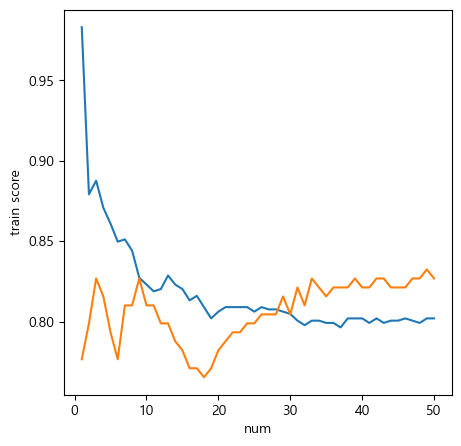

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family="Malgun Gothic")
plt.subplots( figsize=(5,5) )

sns.lineplot(x="num", y="train score", data= score_df)
sns.lineplot(x="num", y="test score", data= score_df)

### GridSearchCV

* GridSearchCV(모델, param_grid=파라미터, cv=폴드 수, n_jobs=코어수)

In [31]:
from sklearn.model_selection import GridSearchCV

k_param = range(1,11)
params = { "n_neighbors" : k_param}

knn = KNeighborsClassifier()

grid_cv = GridSearchCV(knn, param_grid=params, cv=5, n_jobs=-1)
grid_cv.fit(X_train_minMax, y_train)

print("최적의 하이퍼 파라미터 : ",grid_cv.best_params_)
print("예측력 : ", grid_cv.best_score_)

print("train : ", grid_cv.score(X_train_minMax, y_train))
print("test : ", grid_cv.score(X_test_minMax, y_test))

최적의 하이퍼 파라미터 :  {'n_neighbors': 6}
예측력 :  0.8174135723431497
train :  0.8497191011235955
test :  0.776536312849162


In [33]:
params = {
    "n_neighbors" : range(1,11), "metric" : ["manhattan", "euclidean"],
    "weights" : ["uniform", "distance"]
}
grid_cv = GridSearchCV(knn, param_grid=params, cv=5, n_jobs=-1)
grid_cv.fit(X_train_minMax, y_train)

print("최적의 하이퍼 파라미터 : ",grid_cv.best_params_)

print("train : ", grid_cv.score(X_train_minMax, y_train))
print("test : ", grid_cv.score(X_test_minMax, y_test))

최적의 하이퍼 파라미터 :  {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'uniform'}
train :  0.8539325842696629
test :  0.7988826815642458
